# 목차
 * 프로젝트 (1) 왕관 스티커 만들기 
 * 프로젝트 (2) 고양이 수염 스티커 만들기
 * 프로젝트 (3) 하트눈알 스티커 만들기.
 
# 루브릭 평가 기준

 1. 자기만의 카메라앱 기능 구현을 완수하였다.
 2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
 3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
 
# 소감
 이미지를 하는 작업은 재미가 있지만 이제는 이미지말고 동영상에서 내가 움직일때 이모티콘이 같이 움직이면 좋겠다는 실력도 안되는 
 바램을 해본다. 그것도 곧 가능하지 않을까 싶다.
 배경이미지마다 색상이 다른것을 알게 되었고 그러면서 좀더 실력을 키우는것 같다. 
 눈치껏 프로젝트는 완료했지만 하나하나 뜯어서 설명할 실력은 안되고 괴롭다...
 

## 3-1. 카메라 스티커앱 만들기 첫걸음

## 3-2. 어떻게 만들까? 사진 준비하기

In [340]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


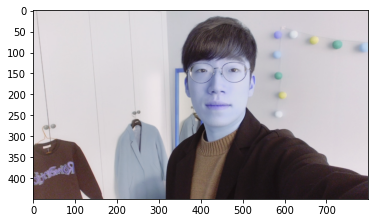

In [341]:
#이미지 처리를 위해 opencv 와 노트북에 이미지를 출력하기 위한 matplotlib를 읽어옵니다.

#준비한 이미지를 읽습니다.

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

얼굴 색에 왜이렇게 푸른빛이 감도는 걸까요? 이것은 opencv의 특징 때문
오늘 사용하게 될 matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용합니다. 
그런데 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용합니다. 그래서 여러분의 원본 사진에서 붉은색은 푸른색으로, 
푸른색은 붉은색으로 바뀌어 출력된 것입니다. 그래서, opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 
아래와 같은 색깔 보정처리를 해주게 됩니다.

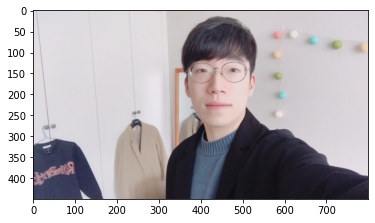

In [342]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 3-3. 얼굴 검출 face detection

In [343]:
#  dlib을 활용해 hog detector를 선언
#detector_hog를 이용해서 얼굴의 bounding box를 추출합니다

detector_hog = dlib.get_frontal_face_detector()


In [344]:

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해 주었습니다.
detector_hog의 두 번째 파라미터는 이미지 피라미드의 수입니다. 
이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 합니다. 
이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능합니다.

rectangles[[(345, 98) (531, 284)]]
345 98 531 284


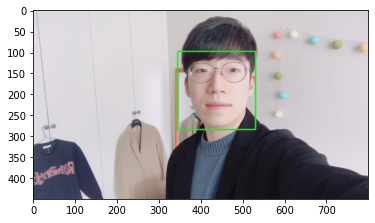

In [345]:
#찾은 얼굴을 화면에 출력


print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    print(l, t, r, b)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


dlib detector 는 dlib.rectangles 타입의 객체를 반환합니다.
dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.

dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함하고 있습니다. 
더 자세한 정보는 dlib docs를 참고해주세요.

다른 사진을 이용한 경우 녹색 박스가 정상적으로 출력되지 않는 경우가 있을 수 있습니다. 그런 경우라면 우선은 저자의 사진을 활용하여 dlib을 통한 face detection이 정상적으로 진행되고 있는지를 체크해 본 후 진행하는 것이 좋겠습니다.

## 3-4  얼굴 랜드마크 face landmark

스티커를 섬세하게 적용하기 위해서는 이목구비의 위치를 아는 것이 중요합니다. 이목구비의 위치를 추론하는 것을 face landmark localization 기술이라고 합니다. face landmark는 detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용합니다.

Object keypoint estimation 알고리즘

Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다. keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.

1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측

2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

이번 예제에서는 1번 방식을 다룹니다.

Dlib landmark localization
잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾습니다.

In [346]:
#저장한 landmark 모델을 불러옵니다.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [347]:
#landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
#print(list_landmarks)

68


points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다. 
조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다. 
따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다. 
이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.

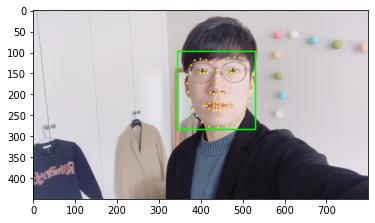

In [348]:
#랜드마크를 영상에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3-5. 스티커 적용하기

이제 왕관 스티커를 머리에 씌울 준비가 되었습니다.
랜드마크를 기준으로 '눈썹 위 얼굴 중앙' 에 스티커를 씌우면 될 것 같습니다. 구현 방법은 여러 가지가 있습니다. 위 그림처럼 코 중심을 기준으로 높이 x 이상에 그려도 되고 눈썹 위 n 픽셀 위에 스티커를 구현해도 됩니다.

중요한 것은 얼굴 위치, 카메라의 거리에 따라 픽셀 x 가 다르기 때문에 비율로 계산을 해줘야 합니다. 계산할 수치는 두 가지 입니다.

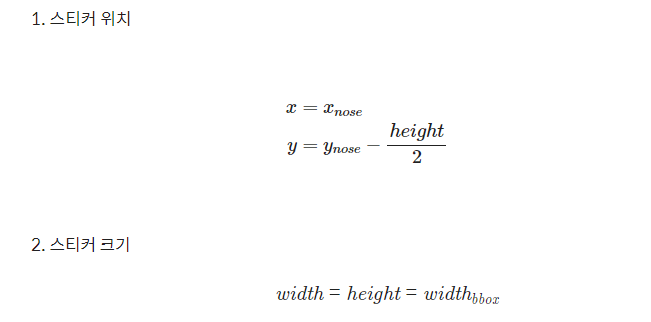

In [349]:
#왕관 이미지를 읽고 윗 단계에서 계산한 크기로 resize 합니다.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(437, 182)
(x,y) : (437,89)
(w,h) : (187,187)


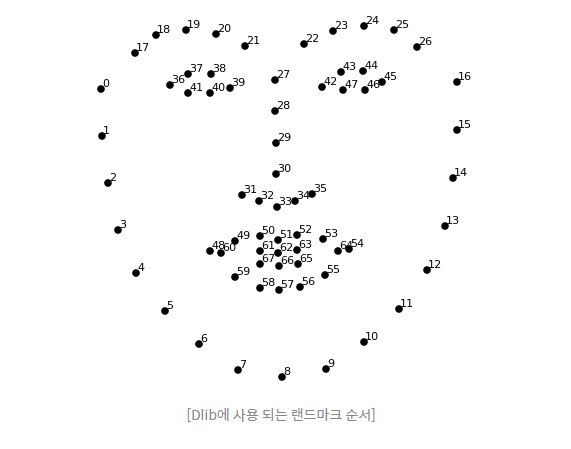

In [350]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


In [351]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,-98)


출력해보면 문제가 생기는 것을 확인할 수 있습니다. y축 좌표의 값이 음수가 계산되었습니다.

스티커의 시작점이 얼굴 사진의 영역을 벗어나면 음수로 표현됩니다. 
그런데 opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다. ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다. 
따라서 그림에서 보시는 것처럼 원본 이미지의 범위를 벗어난 스티커 부분을 제거해 주어야 합니다.

위의 경우에서는 y축 좌표의 값만 음수로 나왔지만 x축 좌표의 값도 음수로 나올 수 있겠죠?

사실 스티커가 원본 이미지의 범위를 넘어가는 경우는 하나 더 있습니다. 
바로 스티커의 시작점 + 스티커 사진의 크기가 원본 이미지의 크기보다 큰 경우입니다. 
스티커 사진의 오른쪽이나 아래쪽으로 넘어가는 경우죠. 이 경우는 어떻게 처리해야 하는지 생각해보세요.

In [352]:
#-y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,0)


In [353]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
# 이제 원본 이미지에 스티커를 적용합니다.

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다. 
예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.

스티커 이미지에서 사용할 부분은 0 이 아닌 색이 있는 부분을 사용합니다. 
따라서 np.where를 통해 img_sticker 가 0 인 부분은 sticker_area를 사용하고 0이 아닌 부분을 img_sticker를 사용하시면 됩니다. 
img_show 에 다시 적용하겠습니다.

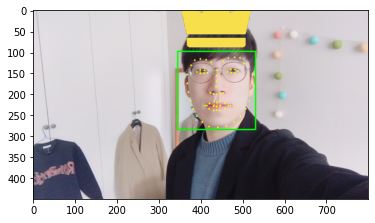

In [354]:
#결과 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#짠~ 스티커 기본 기능이 완성 

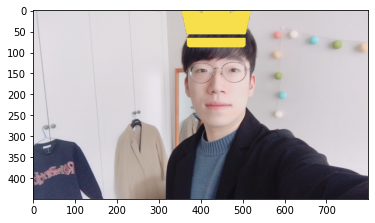

In [355]:
# bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다. 
# img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것입니다.

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 3-6. 프로젝트: 고양이 수염 스티커 만들기

## Step 1. 스티커 구하기 or 만들기
cat-whiskers.png (고양이 수염 스티커 만들기)

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [451]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib



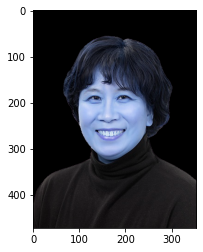

In [238]:

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/img_kim.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

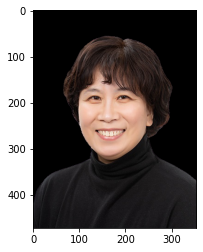

In [239]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [240]:
detector_hog = dlib.get_frontal_face_detector()

In [241]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

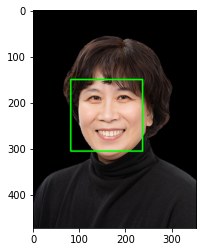

In [242]:
#print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    #print(l, t, r, b)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [243]:
#저장한 landmark 모델을 불러옵니다.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [244]:
#landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
#print(list_landmarks)

68


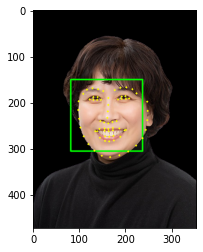

In [245]:
#랜드마크를 영상에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

In [246]:
#고양이 수업 이미지를 읽고 윗 단계에서 계산한 크기로 resize 합니다.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[36][0])*3
    h = (landmark[48][1] - landmark[2][1])*3
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
    
       

(160, 233)
(x,y) : (160,233)
(w,h) : (114,81)


(81, 114, 3)


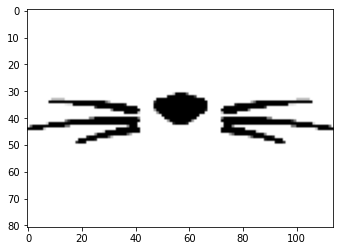

In [247]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
#sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
#img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape)
plt.imshow(img_sticker)


In [248]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (103,193)


In [249]:
#-y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (103,193)


In [250]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
# 이제 원본 이미지에 스티커를 적용합니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)



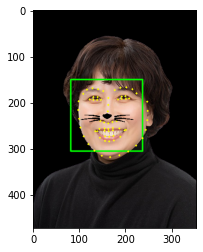

In [253]:


#결과 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#짠~ 스티커 기본 기능이 완성 

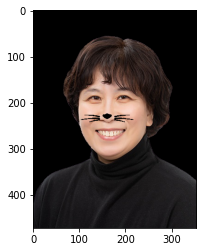

In [254]:
# bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다. 
# img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것입니다.

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 3-6. 번외>프로젝트: 하트눈알 스티커 만들기

In [297]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


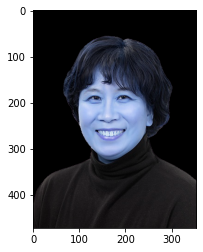

In [298]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/img_kim.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

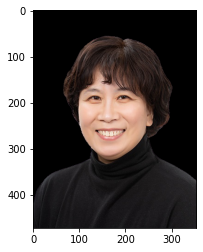

In [299]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [300]:
detector_hog = dlib.get_frontal_face_detector()

In [301]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

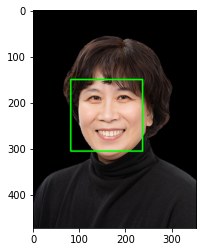

In [302]:
#print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    #print(l, t, r, b)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [303]:
#저장한 landmark 모델을 불러옵니다.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [304]:
#landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
#print(list_landmarks)

68


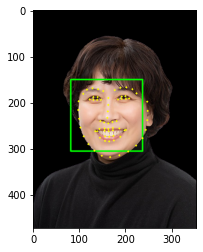

In [305]:
#랜드마크를 영상에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [306]:
#하트 이미지를 읽고 윗 단계에서 계산한 크기로 resize 합니다. - 왼쪽눈
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[40]) # 코의 index는 30 입니다
    x = landmark[40][0]
    y = landmark[40][1]
    w = (landmark[40][0] - landmark[36][0]+10)*3
    h = (landmark[48][1] - landmark[2][1])*3
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
    

(138, 194)
(x,y) : (138,194)
(w,h) : (78,81)


In [307]:
#하트 이미지를 읽고 윗 단계에서 계산한 크기로 resize 합니다. - 오른쪽눈
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[46]) # 코의 index는 30 입니다
    x2 = landmark[46][0]
    y2 = landmark[46][1]
    w2 = (landmark[46][0] - landmark[45][0]+30)*3
    h2 = (landmark[48][1] - landmark[14][1])*3
    print ('(x2,y2) : (%d,%d)'%(x2,y2))
    print ('(w2,h2) : (%d,%d)'%(w2,h2))
    
    

(200, 192)
(x2,y2) : (200,192)
(w2,h2) : (69,72)


(81, 78, 3)


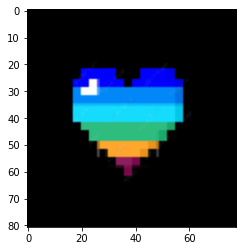

In [308]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/heart-removebg.png'
#sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
#img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape)
plt.imshow(img_sticker)

In [309]:
#오른쪽 눈 하트 붙이기
img_sticker2 = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker2 = cv2.resize(img_sticker2, (w2,h2))

In [310]:
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (99,154)


In [311]:
#오른쪽 눈
refined_x2 = x2 - w2 // 2
refined_y2 = y2 - h2 // 2
print ('(x,y) : (%d,%d)'%(refined_x2, refined_y2))

(x,y) : (166,156)


In [312]:
#-y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (99,154)


In [313]:
#오른쪽 눈 
if refined_x2 < 0: 
    img_sticker2 = img_sticker2[:, -refined_x2:]
    refined_x2 = 0
if refined_y2 < 0:
    img_sticker2 = img_sticker2[-refined_y2:, :]
    refined_y2 = 0

print ('(x2,y2) : (%d,%d)'%(refined_x2, refined_y2))

(x2,y2) : (166,156)


In [314]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0] , refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)




In [315]:
#결과 출력
#plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
#plt.show()

#짠~ 스티커 기본 기능이 완성 

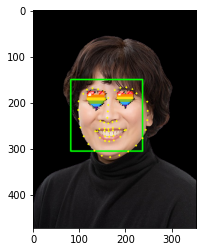

In [316]:
sticker_area2 = img_show[refined_y2:refined_y2+img_sticker2.shape[0] , refined_x2:refined_x2+img_sticker2.shape[1]]

img_show[refined_y2:refined_y2+img_sticker2.shape[0], refined_x2:refined_x2+img_sticker2.shape[1]] = np.where(img_sticker2==0,sticker_area2,img_sticker2).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

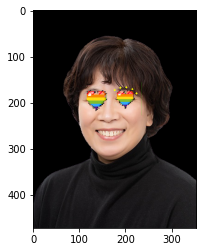

In [317]:
# bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다. 
# img_show 대신, 지금까지 아껴 두었던 img_rgb를 활용할 것입니다.

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y2:refined_y2+img_sticker2.shape[0] , refined_x2:refined_x2+img_sticker2.shape[1]]
img_bgr[refined_y2:refined_y2+img_sticker2.shape[0], refined_x2:refined_x2+img_sticker2.shape[1]] = np.where(img_sticker2==0,sticker_area2,img_sticker2).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()